In [41]:
#import libraries
import os, sys
import json
import pandas as pd
#import geopandas as gpd
import numpy as np
from numpy import int64
import requests, io
import urllib.request
#import folium
#from folium import plugins
#import fiona
#import branca
#from branca.colormap import linear
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [42]:
url = 'https://www.worldometers.info/coronavirus/#countries'
response = requests.get(url)

In [43]:
ex_ussr_ = ['Ukraine', 'Belarus', 'Kyrgyzstan', 'Azerbaijan', 'Tajikistan', 'Armenia', \
           'Georgia', 'Kazakhstan', 'Lithuania', 'Latvia', 'Estonia', 'Uzbekistan']

In [44]:
columns_list = ['#', 'Country', 'Total cases', 'New cases', 'Total deaths', 'New deaths','Total recov\'d', 'New recov\'d', 'Active']

In [45]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [46]:
class HTMLTableParser:
    
    def parse_url(self, url):
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        return [(table['id'],self.parse_html_table(table))\
                for table in soup.find_all('table')]  

    def parse_html_table(self, table):
        n_columns = 0
        n_rows=0
        column_names = []

        # Find number of rows and columns
        # we also find the column titles if we can
        for row in table.find_all('tr'):
            
            # Determine the number of rows in the table
            td_tags = row.find_all('td')
            if len(td_tags) > 0:
                n_rows+=1
                if n_columns == 0:
                    # Set the number of columns for our table
                    n_columns = len(td_tags)
                    
            # Handle column names if we find them
            th_tags = row.find_all('th') 
            if len(th_tags) > 0 and len(column_names) == 0:
                for th in th_tags:
                    column_names.append(th.get_text())

        # Safeguard on Column Titles
        if len(column_names) > 0 and len(column_names) != n_columns:
            raise Exception("Column titles do not match the number of columns")

        columns = column_names if len(column_names) > 0 else range(0,n_columns)
        df = pd.DataFrame(columns = columns,
                          index= range(0,n_rows))
        row_marker = 0
        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')
            for column in columns:
                df.iat[row_marker,column_marker] = column.get_text()
                column_marker += 1
            if len(columns) > 0:
                row_marker += 1
                
        # Convert to float if possible
        for col in df:
            try:
                df[col] = df[col].astype(float)
            except ValueError:
                pass
        
        return df

In [47]:
hp = HTMLTableParser()

In [48]:
table = hp.parse_url(url)[2][1] # Grabbing the table from the tuple

In [49]:
df = table.drop(table.index[[0,1,2,3,4,5,6,7]]).reset_index(drop=True)
df.drop(df.tail(8).index,inplace=True)

In [50]:
df_ussr_all = df[df['Country,Other'].isin(ex_ussr_)]

In [51]:
df_ussr = df_ussr_all[['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']]

In [52]:
for col in df_ussr.columns[2:9]: 
    df_ussr[col] = df_ussr[col].str.replace('+', '').str.replace(',', '').str.replace(' ', '').str.replace(' ', '')
    

<ipython-input-52-bfc1f798a5a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ussr[col] = df_ussr[col].str.replace('+', '').str.replace(',', '').str.replace(' ', '').str.replace(' ', '')


In [53]:
df_ussr.columns = columns_list

In [54]:
for col in df_ussr.columns[2:9]: 
    df_ussr[col] = pd.to_numeric(df_ussr[col], errors='ignore')

<ipython-input-54-646f7835ec30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ussr[col] = pd.to_numeric(df_ussr[col], errors='ignore')


In [55]:
df_ussr.fillna(0, inplace=True)
df_ussr.replace(np.nan, 0, inplace=True)
df_ussr.replace(np.inf, 0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [56]:
df_ussr[columns_list[2:9]] = df_ussr[columns_list[2:9]].astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [57]:
df_russia_all = df[df['Country,Other'] == 'Russia']
df_russia = df_russia_all[['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']]

for col in df_russia.columns[2:9]: 
    df_russia[col] = df_russia[col].str.replace('+', '').str.replace(',', '').str.replace(' ', '').str.replace(' ', '')

df_russia.columns = columns_list

for col in df_russia.columns[2:9]: 
    df_russia[col] = pd.to_numeric(df_russia[col], errors='ignore')
    
df_russia.fillna(0, inplace=True)
df_russia.replace(np.nan, 0, inplace=True)
df_russia.replace(np.inf, 0, inplace=True)

df_russia[columns_list[2:9]] = df_russia[columns_list[2:9]].astype('int64')

<ipython-input-57-db7e023a4019>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_russia[col] = df_russia[col].str.replace('+', '').str.replace(',', '').str.replace(' ', '').str.replace(' ', '')
<ipython-input-57-db7e023a4019>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_russia[col] = pd.to_numeric(df_russia[col], errors='ignore')


In [58]:
df_ussr = df_ussr.append(df_russia, ignore_index=True)

In [59]:
from shapely.geometry import LineString, MultiPolygon, Polygon
from shapely.ops import split
from shapely.affinity import translate
import geopandas

def shift_geom(shift, gdataframe, plotQ=False):
    # this code is adapted from somewhere found in SO
    # *** will give credit here ***
    shift -= 180
    moved_map = []
    splitted_map = []
    border = LineString([(shift,90),(shift,-90)])

    for row in gdataframe["geometry"]:
        splitted_map.append(split(row, border))
    for element in splitted_map:
        items = list(element)
        for item in items:
            minx, miny, maxx, maxy = item.bounds
            if minx >= shift:
                moved_map.append(translate(item, xoff=-180-shift))
            else:
                moved_map.append(translate(item, xoff=180-shift))

    # got `moved_map` as the moved geometry            
    gdf = geopandas.GeoDataFrame({"geometry": moved_map})
    # can move back to original pos by rerun with -ve shift

    # can change crs here
    if plotQ:
        fig, ax = plt.subplots()
        gdf.plot(ax=ax)
        plt.show()

    return gdf

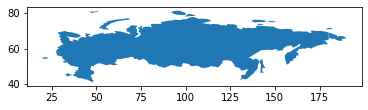

In [60]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'continent', 'geometry', 'pop_est', 'gdp_md_est']]

ex_ussr = ['Ukraine', 'Belarus', 'Kyrgyzstan', 'Azerbaijan', 'Tajikistan', 'Armenia', \
           'Georgia', 'Kazakhstan', 'Lithuania', 'Latvia', 'Estonia', 'Uzbekistan']

# ex_ussr w/o russia
ex_ussr_gdf = world[world['name'].isin(ex_ussr)]
# russia only
russia = world[ world['name']=='Russia' ]

# manipulate russia's geometry
rus_shift_90 = shift_geom(90, russia, False)        # Do not plot
good_geom_rus = shift_geom(-90, rus_shift_90, True) # Plot it

# a plot of new geometry appears

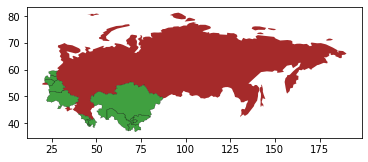

In [61]:
# Create geodataframe with 1 row (Multi-polygon) using this geometry
newrus_gdf = geopandas.GeoDataFrame( { "name": ["Russia"] , "new_geometry": [good_geom_rus.geometry.unary_union]}, \
                             geometry="new_geometry", crs="EPSG:4326")
# Merge `russia` with `newrus_gdf` to get everything in 1 dataframe
russia_final = russia.merge(right=newrus_gdf , on="name")

# Set the `new_geometry` from `newrus_gdf` as the geometry
russia_final.set_geometry("new_geometry", drop=True, inplace=True)

# plot all ex_ussr together = `russia_final` + `ex_ussr_gdf`
rus_ax = russia_final.plot(color='brown')
ex_ussr_gdf.plot(ax=rus_ax, color="green", ec="black", lw=0.3, alpha=0.75)

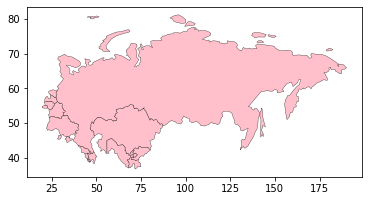

In [62]:
ex_ussr_gdf = ex_ussr_gdf.append(russia_final, ignore_index=True)
ex_ussr_gdf.plot(color="pink", ec="black", lw=0.3)

In [63]:
ex_ussr_gdf = ex_ussr_gdf.rename(columns={'name': 'Country'})

In [64]:
df_ex_ussr_gdf = pd.merge(df_ussr, ex_ussr_gdf, on='Country')
crs = {'init': 'epsg:4326'}
corona_gpd = geopandas.GeoDataFrame(df_ex_ussr_gdf, crs=crs, geometry='geometry')

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


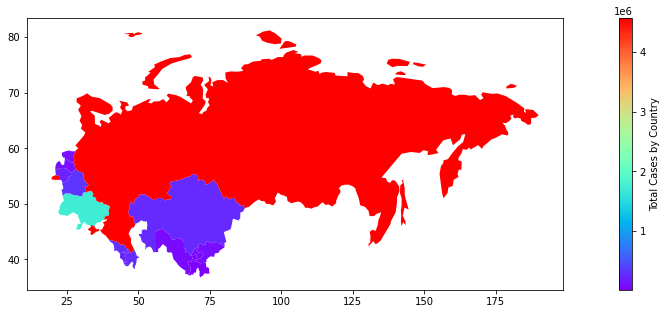

In [65]:
f, ax = plt.subplots(1, 1, figsize=(20,5))
ax = corona_gpd.plot(column='Total cases', cmap='rainbow', ax=ax, legend=True, legend_kwds={'label': 'Total Cases by Country'})

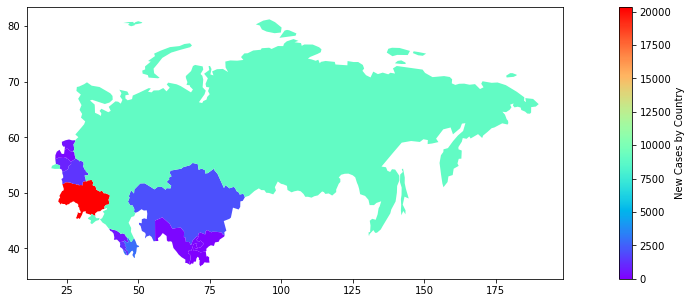

In [66]:
f, ax = plt.subplots(1, 1, figsize=(20,5))
ax = corona_gpd.plot(column='New cases', cmap='rainbow', ax=ax, legend=True, legend_kwds={'label': 'New Cases by Country'})